In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
athletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [5]:
athletes.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [6]:
regions.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [7]:
df = pd.merge(athletes,regions,on="NOC")

In [8]:
df.head()

ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

   Year  Season            City       Sport  \
0  1992  Summer       Barcelona  Basketball   
1  2012  Summer          London        Judo   
2  2000  Summer          Sydney      Boxing   
3  2004  Summer          Athina   Wrestling   
4  2016  Summer  Rio de Janeiro    Swimming   

                                      Event Medal region notes  
0               Basketball Men's Basketball   NaN  China   NaN  
1              Judo Men's Extra-Lightweight   NaN  China   NaN  
2                 Boxing Men's Middleweight   NaN  China   NaN  
3  Wrestling Men's Lightweight, Greco-Roman   NaN  China   NaN  
4     Swimming Women's 200 metres Freestyle   NaN  China   NaN

In [9]:
df.shape

(270767, 17)

In [10]:
df.duplicated().sum()

1385

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229619
region        21
notes     264347
dtype: int64

In [14]:
df["Medal"].unique()

array([nan, 'Silver', 'Bronze', 'Gold'], dtype=object)

In [15]:
df["Medal"].fillna("No_Medal",inplace=True)

In [16]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region        21
notes     264347
dtype: int64

In [17]:
df.head()

ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

   Year  Season            City       Sport  \
0  1992  Summer       Barcelona  Basketball   
1  2012  Summer          London        Judo   
2  2000  Summer          Sydney      Boxing   
3  2004  Summer          Athina   Wrestling   
4  2016  Summer  Rio de Janeiro    Swimming   

                                      Event     Medal region notes  
0               Basketball Men's Basketball  No_Medal  China   NaN  
1              Judo Men's Extra-Lightweight  No_Medal  China   NaN  
2                 Boxing Men's Middleweight  No_Medal  China   NaN  
3  Wrestling Men's Lightweight, Greco-Roman  No_Medal  China   NaN  
4     Swimming Women's 200 metres Freestyle  No_Medal  China   NaN

In [18]:
df["Season"].value_counts()

Summer    220818
Winter     48564
Name: Season, dtype: int64

In [19]:
summer = df[df["Season"] == "Summer"]
winter = df[df["Season"] == "Winter"]

In [20]:
summer.shape

(220818, 17)

In [21]:
winter.shape

(48564, 17)

### 1. Season-Wise Medal Tally

In [22]:
medal_counts_summer = summer.groupby(["NOC","Medal"]).size().reset_index(name="count")

In [23]:
medal_counts_summer

NOC     Medal  count
0    AFG    Bronze      2
1    AFG  No_Medal    124
2    AHO  No_Medal     73
3    AHO    Silver      1
4    ALB  No_Medal     63
..   ...       ...    ...
579  ZAM    Silver      1
580  ZIM    Bronze      1
581  ZIM      Gold     17
582  ZIM  No_Medal    287
583  ZIM    Silver      4

[584 rows x 3 columns]

In [24]:
medal_pivot_summer = medal_counts_summer.pivot(index="NOC" , columns="Medal", values="count").fillna(0)

In [25]:
medal_pivot_summer

Medal  Bronze   Gold  No_Medal  Silver
NOC                                   
AFG       2.0    0.0     124.0     0.0
AHO       0.0    0.0      73.0     1.0
ALB       0.0    0.0      63.0     0.0
ALG       8.0    5.0     522.0     4.0
AND       0.0    0.0      53.0     0.0
..        ...    ...       ...     ...
YEM       0.0    0.0      32.0     0.0
YMD       0.0    0.0       5.0     0.0
YUG      92.0  130.0    1659.0   161.0
ZAM       1.0    0.0     181.0     1.0
ZIM       1.0   17.0     287.0     4.0

[229 rows x 4 columns]

In [26]:
medal_pivot_summer = medal_pivot_summer.astype(int)

In [27]:
medal_pivot_summer

Medal  Bronze  Gold  No_Medal  Silver
NOC                                  
AFG         2     0       124       0
AHO         0     0        73       1
ALB         0     0        63       0
ALG         8     5       522       4
AND         0     0        53       0
..        ...   ...       ...     ...
YEM         0     0        32       0
YMD         0     0         5       0
YUG        92   130      1659     161
ZAM         1     0       181       1
ZIM         1    17       287       4

[229 rows x 4 columns]

In [28]:
medal_pivot_summer["Total_medal"] = medal_pivot_summer[["Gold","Silver","Bronze"]].sum(axis=1)

In [29]:
medal_pivot_summer

Medal  Bronze  Gold  No_Medal  Silver  Total_medal
NOC                                               
AFG         2     0       124       0            2
AHO         0     0        73       1            1
ALB         0     0        63       0            0
ALG         8     5       522       4           17
AND         0     0        53       0            0
..        ...   ...       ...     ...          ...
YEM         0     0        32       0            0
YMD         0     0         5       0            0
YUG        92   130      1659     161          383
ZAM         1     0       181       1            2
ZIM         1    17       287       4           22

[229 rows x 5 columns]

In [30]:
medal_pivot_summer.sort_values(by=["Gold","Silver","Bronze"],ascending=False).head(30)

Medal  Bronze  Gold  No_Medal  Silver  Total_medal
NOC                                               
USA      1197  2472      9813    1333         5002
URS       596   832      2559     635         2063
GBR       620   635      8792     729         1984
GER       649   592      5747     538         1779
ITA       454   518      6724     474         1446
FRA       587   463      8809     567         1617
HUN       363   432      4951     328         1123
SWE       358   354      4920     396         1108
AUS       510   342      5787     452         1304
GDR       227   339      1261     277          843
CHN       258   334      3414     317          909
RUS       331   296      2678     278          905
NED       371   245      4188     302          918
JPN       333   230      5466     287          850
NOR       167   227      2002     196          590
DEN       177   179      2827     236          592
KOR       175   171      3140     206          552
CUB       116   164      2070     129          409
ROU       290   161      3079     200          651
CAN       344   158      6066     239          741
FRG       188   144      2054     172          504
FIN       217   132      3084     125          474
IND        40   131      1188      19          190
YUG        92   130      1659     161          383
POL       242   111      4278     185          538
ESP       135   109      4420     243          487
BRA       191   109      3309     175          475
SUI       139    99      3522     178          416
BEL       166    96      3085     193          455
EUN        67    92       430      61          220

The problem here is that, all the countries **have not** won these many medals, it is counting every player's every event as a medal, so, lets solve this problem...

In [31]:
summer.head()

ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

   Year  Season            City       Sport  \
0  1992  Summer       Barcelona  Basketball   
1  2012  Summer          London        Judo   
2  2000  Summer          Sydney      Boxing   
3  2004  Summer          Athina   Wrestling   
4  2016  Summer  Rio de Janeiro    Swimming   

                                      Event     Medal region notes  
0               Basketball Men's Basketball  No_Medal  China   NaN  
1              Judo Men's Extra-Lightweight  No_Medal  China   NaN  
2                 Boxing Men's Middleweight  No_Medal  China   NaN  
3  Wrestling Men's Lightweight, Greco-Roman  No_Medal  China   NaN  
4     Swimming Women's 200 metres Freestyle  No_Medal  China   NaN

In [32]:
summer.shape

(220818, 17)

Lets check now...

In [33]:
medal_counts_summer = summer.groupby(["NOC","Medal"]).size().reset_index(name="count")

In [34]:
medal_counts_summer

NOC     Medal  count
0    AFG    Bronze      2
1    AFG  No_Medal    124
2    AHO  No_Medal     73
3    AHO    Silver      1
4    ALB  No_Medal     63
..   ...       ...    ...
579  ZAM    Silver      1
580  ZIM    Bronze      1
581  ZIM      Gold     17
582  ZIM  No_Medal    287
583  ZIM    Silver      4

[584 rows x 3 columns]

In [35]:
medal_pivot_summer = medal_counts_summer.pivot(index="NOC" , columns="Medal", values="count").fillna(0)

In [36]:
medal_pivot_summer = medal_pivot_summer.astype(int)

In [37]:
medal_pivot_summer["Total_medal"] = medal_pivot_summer[["Gold","Silver","Bronze"]].sum(axis=1)

In [38]:
medal_pivot_summer

Medal  Bronze  Gold  No_Medal  Silver  Total_medal
NOC                                               
AFG         2     0       124       0            2
AHO         0     0        73       1            1
ALB         0     0        63       0            0
ALG         8     5       522       4           17
AND         0     0        53       0            0
..        ...   ...       ...     ...          ...
YEM         0     0        32       0            0
YMD         0     0         5       0            0
YUG        92   130      1659     161          383
ZAM         1     0       181       1            2
ZIM         1    17       287       4           22

[229 rows x 5 columns]

In [39]:
medal_pivot_summer.sort_values(by=["Gold","Silver","Bronze"],ascending=False).head(30)

Medal  Bronze  Gold  No_Medal  Silver  Total_medal
NOC                                               
USA      1197  2472      9813    1333         5002
URS       596   832      2559     635         2063
GBR       620   635      8792     729         1984
GER       649   592      5747     538         1779
ITA       454   518      6724     474         1446
FRA       587   463      8809     567         1617
HUN       363   432      4951     328         1123
SWE       358   354      4920     396         1108
AUS       510   342      5787     452         1304
GDR       227   339      1261     277          843
CHN       258   334      3414     317          909
RUS       331   296      2678     278          905
NED       371   245      4188     302          918
JPN       333   230      5466     287          850
NOR       167   227      2002     196          590
DEN       177   179      2827     236          592
KOR       175   171      3140     206          552
CUB       116   164      2070     129          409
ROU       290   161      3079     200          651
CAN       344   158      6066     239          741
FRG       188   144      2054     172          504
FIN       217   132      3084     125          474
IND        40   131      1188      19          190
YUG        92   130      1659     161          383
POL       242   111      4278     185          538
ESP       135   109      4420     243          487
BRA       191   109      3309     175          475
SUI       139    99      3522     178          416
BEL       166    96      3085     193          455
EUN        67    92       430      61          220

We can now see that the numbers are accurate

In [40]:
summer = summer.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event"])

In [41]:
summer.shape

(98657, 17)

Lets do the same for winters data

In [42]:
winter = winter.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event"])

In [43]:
winter.shape

(16956, 17)

In [44]:
medal_counts_winter = winter.groupby(["NOC","Medal"]).size().reset_index(name="count")

In [45]:
medal_pivot_winter = medal_counts_winter.pivot(index="NOC" , columns="Medal", values="count").fillna(0)

In [46]:
medal_pivot_winter

Medal  Bronze  Gold  No_Medal  Silver
NOC                                  
AHO       0.0   0.0       3.0     0.0
ALB       0.0   0.0       7.0     0.0
ALG       0.0   0.0       9.0     0.0
AND       0.0   0.0      69.0     0.0
ARG       0.0   0.0     169.0     0.0
..        ...   ...       ...     ...
USA      44.0  39.0     894.0    48.0
UZB       0.0   1.0      26.0     0.0
VEN       0.0   0.0       5.0     0.0
YUG       1.0   0.0     167.0     1.0
ZIM       0.0   0.0       2.0     0.0

[119 rows x 4 columns]

In [47]:
medal_pivot_winter = medal_pivot_winter.astype(int)

In [48]:
medal_pivot_winter["Total_medal"] = medal_pivot_winter[["Gold","Silver","Bronze"]].sum(axis=1)

In [49]:
medal_pivot_winter.sort_values(by=["Gold","Silver","Bronze"] , ascending=False).head(30)

Medal  Bronze  Gold  No_Medal  Silver  Total_medal
NOC                                               
NOR        48    58       529      43          149
URS        24    46       216      24           94
CAN        25    43       770      34          102
USA        44    39       894      48          131
GER        36    39       534      38          113
RUS        21    28       388      22           71
SWE        31    23       560      22           76
AUT        24    21       594      31           76
ITA        25    19       739      17           61
GDR        19    19       133      17           55
SUI        27    18       556      22           67
FIN        26    15       442      30           71
KOR         1    14       330       7           22
NED        11    10       202      12           33
FRA        25     8       640      14           47
GBR         9     8       513       3           20
JPN         7     7       688       7           21
FRG        11     6       209       8           25
CZE         5     6       280       5           16
CHN        12     5       296       8           25
AUS         4     5       312       3           12
EUN         4     5        48       2           11
POL         4     3       474       3           10
BLR         3     3       174       2            8
UKR         1     2       245       1            4
TCH        11     1       285       6           18
CRO         1     1        87       5            7
BEL         3     1       117       1            5
BUL         0     1       270       1            2
ESP         0     1       180       0            1

In [63]:
medal_pivot_winter

Medal  Bronze  Gold  No_Medal  Silver  Total_medal
NOC                                               
AHO         0     0         3       0            0
ALB         0     0         7       0            0
ALG         0     0         9       0            0
AND         0     0        69       0            0
ARG         0     0       169       0            0
..        ...   ...       ...     ...          ...
USA        44    39       894      48          131
UZB         0     1        26       0            1
VEN         0     0         5       0            0
YUG         1     0       167       1            2
ZIM         0     0         2       0            0

[119 rows x 5 columns]

# VS Code ---

In [66]:
pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/ef/e1/f9c479f9dbe0bb702ea5ca6608f10e91a708b438f7fb4572a2642718c6e3/streamlit-1.39.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/9b/52/4a86a4fa1cc2aae79137cc9510b7080c3e5aede2310d14fae5486feec7f7/altair-5.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a4/07/14f8ad37f2d12a5ce41206c21820d8cb6561b728e51fad4530dff0552a67/cachetools-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<6,>=3.20 from https://files.pythonhosted.org/packages

###  COUNTRY-WISE MEDAL TALLY

In [50]:
medal_pivot_summer

Medal  Bronze  Gold  No_Medal  Silver  Total_medal
NOC                                               
AFG         2     0       124       0            2
AHO         0     0        73       1            1
ALB         0     0        63       0            0
ALG         8     5       522       4           17
AND         0     0        53       0            0
..        ...   ...       ...     ...          ...
YEM         0     0        32       0            0
YMD         0     0         5       0            0
YUG        92   130      1659     161          383
ZAM         1     0       181       1            2
ZIM         1    17       287       4           22

[229 rows x 5 columns]

In [53]:
def fetch_noc(noc,pivot_table):
    if noc in pivot_table.index:
        details ={
            "Gold" : pivot_table.loc[noc,"Gold"],
            "Silver" : pivot_table.loc[noc,"Silver"],
            "Bronze" : pivot_table.loc[noc,"Bronze"],
            "Total Medal" : pivot_table.loc[noc,"Total_medal"]
        }
        return details
    else:
        print("No NOC exists")

In [54]:
fetch_noc("USA" , medal_pivot_summer)

{'Gold': 2472, 'Silver': 1333, 'Bronze': 1197, 'Total Medal': 5002}

### YEAR_WISE SEARCH

In [55]:
summer.head()

ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

   Year  Season            City       Sport  \
0  1992  Summer       Barcelona  Basketball   
1  2012  Summer          London        Judo   
2  2000  Summer          Sydney      Boxing   
3  2004  Summer          Athina   Wrestling   
4  2016  Summer  Rio de Janeiro    Swimming   

                                      Event     Medal region notes  
0               Basketball Men's Basketball  No_Medal  China   NaN  
1              Judo Men's Extra-Lightweight  No_Medal  China   NaN  
2                 Boxing Men's Middleweight  No_Medal  China   NaN  
3  Wrestling Men's Lightweight, Greco-Roman  No_Medal  China   NaN  
4     Swimming Women's 200 metres Freestyle  No_Medal  China   NaN

In [56]:
summer.shape

(98657, 17)

In [57]:
summer.isnull().sum()

ID            0
Name          0
Sex           0
Age        3119
Height    17827
Weight    18182
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region       20
notes     96593
dtype: int64

In [58]:
summer.dropna(subset=["region"] , inplace=True)

In [60]:
summer.shape

(98637, 17)

In [61]:
medals_count = summer.groupby(["Year","region","Medal"]).size().unstack(fill_value=0)

In [62]:
medals_count 

Medal                         Bronze  Gold  No_Medal  Silver
Year region                                                 
1896 Australia                     1     2         2       0
     Austria                       2     2         3       1
     Denmark                       3     1         6       2
     France                        2     1        11       4
     Germany                       1     4        21       1
...                              ...   ...       ...     ...
2016 Virgin Islands, British       0     0         4       0
     Virgin Islands, US            0     0         7       0
     Yemen                         0     0         3       0
     Zambia                        0     0         7       0
     Zimbabwe                      0     0        13       0

[2769 rows x 4 columns]

In [63]:
medals_count = medals_count.reset_index()

In [64]:
medals_count

Medal  Year                   region  Bronze  Gold  No_Medal  Silver
0      1896                Australia       1     2         2       0
1      1896                  Austria       2     2         3       1
2      1896                  Denmark       3     1         6       2
3      1896                   France       2     1        11       4
4      1896                  Germany       1     4        21       1
...     ...                      ...     ...   ...       ...     ...
2764   2016  Virgin Islands, British       0     0         4       0
2765   2016       Virgin Islands, US       0     0         7       0
2766   2016                    Yemen       0     0         3       0
2767   2016                   Zambia       0     0         7       0
2768   2016                 Zimbabwe       0     0        13       0

[2769 rows x 6 columns]

In [65]:
medals_count["Total_Medal"] = medals_count["Gold"] + medals_count["Silver"] + medals_count["Bronze"]

In [66]:
medals_count

Medal  Year                   region  Bronze  Gold  No_Medal  Silver  \
0      1896                Australia       1     2         2       0   
1      1896                  Austria       2     2         3       1   
2      1896                  Denmark       3     1         6       2   
3      1896                   France       2     1        11       4   
4      1896                  Germany       1     4        21       1   
...     ...                      ...     ...   ...       ...     ...   
2764   2016  Virgin Islands, British       0     0         4       0   
2765   2016       Virgin Islands, US       0     0         7       0   
2766   2016                    Yemen       0     0         3       0   
2767   2016                   Zambia       0     0         7       0   
2768   2016                 Zimbabwe       0     0        13       0   

Medal  Total_Medal  
0                3  
1                5  
2                6  
3                7  
4                6  
...            ...  
2764             0  
2765             0  
2766             0  
2767             0  
2768             0  

[2769 rows x 7 columns]

In [72]:
def plot_medals(year , country , df):

    filtered_df = df[(df["Year"]== year) & (df["region"]==country)]
    
    gold = filtered_df["Gold"].values[0]
    silver = filtered_df["Silver"].values[0]
    bronze = filtered_df["Bronze"].values[0]
    total_medal = filtered_df["Total_Medal"].values[0]
    
    fig,ax = plt.subplots()
    medals=["Gold","Silver","Bronze","Total_Medals"]
    counts = [gold , silver , bronze, total_medal]
    ax.bar(medals,counts,color=["gold","silver","brown","green"])
    plt.show()

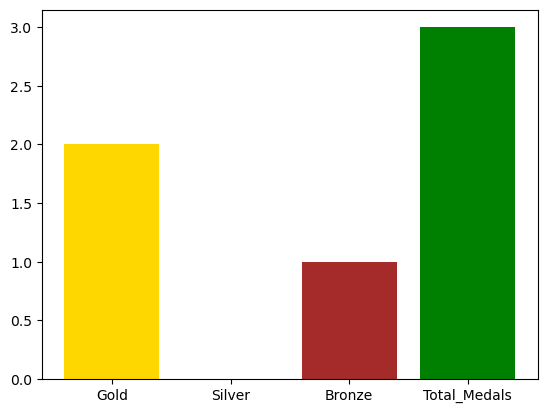

In [73]:
plot_medals(1896,"Australia",medals_count)

### YEAR WISE  PROGRESS OF A COUNTRY

In [74]:
medals_count

Medal  Year                   region  Bronze  Gold  No_Medal  Silver  \
0      1896                Australia       1     2         2       0   
1      1896                  Austria       2     2         3       1   
2      1896                  Denmark       3     1         6       2   
3      1896                   France       2     1        11       4   
4      1896                  Germany       1     4        21       1   
...     ...                      ...     ...   ...       ...     ...   
2764   2016  Virgin Islands, British       0     0         4       0   
2765   2016       Virgin Islands, US       0     0         7       0   
2766   2016                    Yemen       0     0         3       0   
2767   2016                   Zambia       0     0         7       0   
2768   2016                 Zimbabwe       0     0        13       0   

Medal  Total_Medal  
0                3  
1                5  
2                6  
3                7  
4                6  
...            ...  
2764             0  
2765             0  
2766             0  
2767             0  
2768             0  

[2769 rows x 7 columns]

In [78]:
def plot_year_progress(country , df):
    filtered_df = df[df["region"] == country]
    fig,ax = plt.subplots()
    ax.plot(filtered_df["Year"] , filtered_df["Gold"] , color="gold" , label="GOLD" , marker="o" , linestyle="-")
    ax.plot(filtered_df["Year"] , filtered_df["Silver"] , color="silver" , label="SILVER", marker="o" , linestyle="-")
    ax.plot(filtered_df["Year"] , filtered_df["Bronze"] , color="brown" , label="BRONZE", marker="o" , linestyle="-")
    ax.plot(filtered_df["Year"] , filtered_df["Total_Medal"] , color="green" , label="TOTAL MEDALS", marker="o" , linestyle="-")
    ax.legend()
    plt.show()
    
    
    

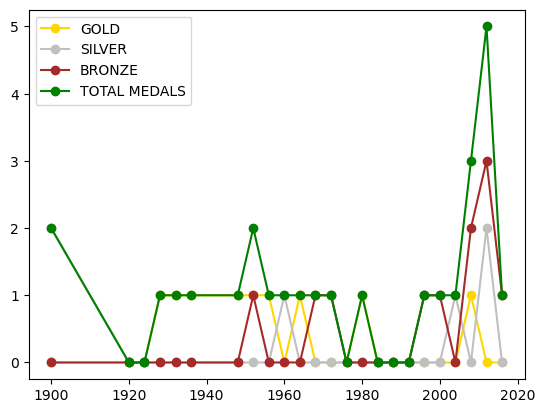

In [79]:
plot_year_progress("India" , medals_count)

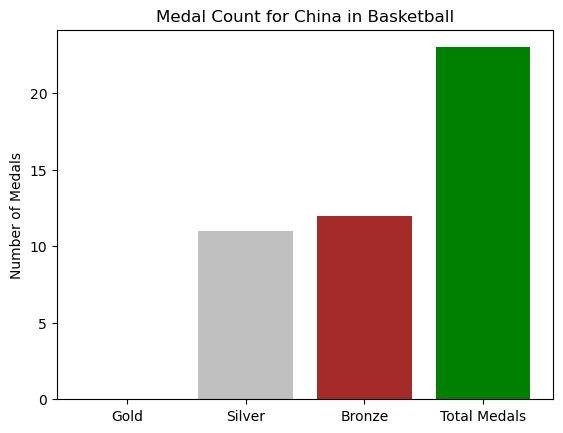

In [113]:
def country_sport_medals(sport, country, df):

    df["Sport"] = df["Sport"].str.strip().str.lower()
    df["Team"] = df["Team"].str.strip().str.lower()
    df["Medal"] = df["Medal"].str.strip().str.lower()

    sport = sport.strip().lower()
    country = country.strip().lower()

    filtered_df = df[(df["Sport"] == sport) & (df["Team"] == country) & (df["Medal"] != "no_medal")]

    if filtered_df.empty:
        print(f"No data found for Sport: {sport} and Country: {country.capitalize()}")
        return

    medal_counts = filtered_df["Medal"].value_counts().to_dict()
    gold = medal_counts.get("gold", 0)
    silver = medal_counts.get("silver", 0)
    bronze = medal_counts.get("bronze", 0)
    total_medals = gold + silver + bronze

    # Plotting the bar graph
    fig, ax = plt.subplots()
    medals = ["Gold", "Silver", "Bronze", "Total Medals"]
    counts = [gold, silver, bronze, total_medals]

    ax.bar(medals, counts, color=["gold", "silver", "brown", "green"])
    ax.set_title(f'Medal Count for {country.capitalize()} in {sport.capitalize()}')
    ax.set_ylabel('Number of Medals')
    plt.show()

country_sport_medals('basketball', 'China', df)
